In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 회귀의 선형 모델

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향, 모델이 학습할 파라미터 (intercept)
  + $w_1$~$w_p$: 가중치


w[0]: 0.393906  b: -0.031804


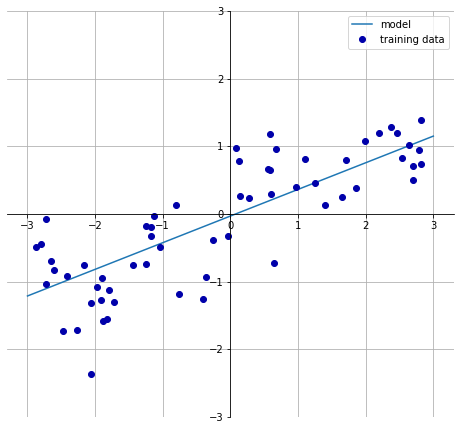

In [2]:
mglearn.plots.plot_linear_regression_wave()
#knn regressor 과 비교했을 때 제약이 더 많아 보임
#특성이 많은 데이터셋에서는 선형 모델은 매우 훌륭한 선능 보일 수 있음.
#특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타킷 y도 완벽하게(훈련세트에 대해서)선형 함수로 모델링 할 수 있음.
#선형대수 공부가 필요함.....^0^

#### 회귀에서 많이 쓰이는 선형 모델 **`1.선형회귀(최소제곱법)`**
- 선형 회귀(linear regression) 또는 최소제곱법(OLS)은 가장 간단하고 오래된 회귀용 선형 알고리즘
- 선형 회귀는 예측과 훈련 세트에 있는 타깃 $y$ 사이의 평균제곱오차(MSE)를 최소화한 파라미터 $w$와 $b$를 찾음.
- 선형회귀는 매개변수가 없는 것이 장점이지만 이때문에 모델의 복잡도를 제어할 방법이 없음.
\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}


- **intercept_** 속성은 항상 실수 값 하나지만, **coef_** 속성은 각 입력 특성에 하나씩 대응되는 **NumPy** 배열임

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

print(f'lr.coef:{lr.coef_}')
print(f'lr.intercept:{lr.intercept_}')

#scikit-learn은  훈련데이터에서 유도된 속성의 끝에는 밑줄(_) 붙임 -> 사용자가 지정한 매개변수와 구분하기 위해서임

lr.coef:[0.39390555]
lr.intercept:-0.031804343026759746


In [4]:
# 훈련 세트와 테스트 세트의 성능 확인

print(f'Train Score:{lr.score(X_train,y_train)}')
print(f'Test Score:{lr.score(X_test,y_test)}')

#R2값이 0.66이면 그리 좋은 결과 아님. 훈련세트와 테스트세트의 점수가 비슷하다는 것은 과소적합인 상태 의미
#1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합 걱정할 필요 없음.
#그러나 특성이 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져 과대적합될 가능성 높음

Train Score:0.6700890315075756
Test Score:0.65933685968637


In [5]:
X,y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

print(f'Train Score:{lr.score(X_train,y_train)}')
print(f'Test Score:{lr.score(X_test,y_test)}')

#훈련 데이터와 테스트 데이터 사이의 이와 같은 성능차이는 모델이 과대적합되었다는 확실한 신호
#이를 해결하기 위해 복잡도를 제어할 수 있는 모델을 사용해야함.

Train Score:0.9520519609032733
Test Score:0.6074721959665965


#### 회귀에서 많이 쓰이는 선형 모델 **`2.Ridge Regression`**
- 가중치($w$) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음
- 가중치의 절댓값을 가능한 한 작게 만드는 법. -> $w$의 모든 원소가 0에 가깝게 
- 직관적으로 생각하면 이는 모든 특성이 출력해 주는 영향을 최소한으로 만듦.(기울기 작게)
- **규제(Regulation)** : 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미 
- **Ridge의 규제방식 : L2 규제방식**

In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print(f'Train Score:{ridge.score(X_train,y_train):.2f}')
print(f'Test Score:{ridge.score(X_test,y_test):.2f}')

#LinearRegression이랑 비교해보면 Train Score는 더 낮지만 Test Score가 올라감.
#선형회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어짐.
#모델의 적합되가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 됨. 
#우리의 관심은 테스트 세트에 대한 성능이기 때문에 LinearRegression 보다 Ridge를 선택해야함.

Train Score:0.89
Test Score:0.75


- 사용자는 `alpha` 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지 지정할 수 있음.
- $default = 0.1 $ 
- 최적의 알파는 데이터셋에 달려있음. 알파값이 커지만 계수를 0에 더 가깝게 만들어 훈련세터의 성능은 나빠지지만 일반화에는 도움 줄 수 있음
- 아주 작은 알파값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아짐
- 높은 알파값은 제약이 더 많은 모델이므로 작은 알파값일 때보다 coef_의 절대값의 크기가 더 작을것으로 예상할 수 있음.

In [7]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print(f'Train Score:{ridge10.score(X_train,y_train):.2f}')
print(f'Test Score:{ridge10.score(X_test,y_test):.2f}')

Train Score:0.79
Test Score:0.64


In [8]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print(f'Train Score:{ridge01.score(X_train,y_train):.2f}')
print(f'Test Score:{ridge01.score(X_test,y_test):.2f}')

Train Score:0.93
Test Score:0.77


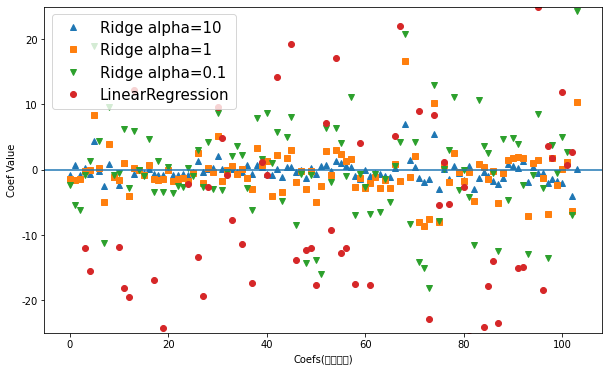

In [9]:
plt.figure(figsize=(10,6))
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge.coef_,'s',label= 'Ridge alpha=1')
plt.plot(ridge01.coef_,'v',label ='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('Coefs(계수목록)')  # 특성x 값에 대한 계수 
plt.ylabel('Coef Value')
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend(fontsize =15)


> 규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시키는 것  
    - 보스턴 주택가격 데이터셋에 여러 가지 크기로 샘플링하여 LinearRegression과 Ridge(alpha=1)을 적용한것.  
    - 데이터셋의 크기에 따른 모델의 성능변화를 나타낸 그래프를 `학습곡선(learning curve)`라고 함

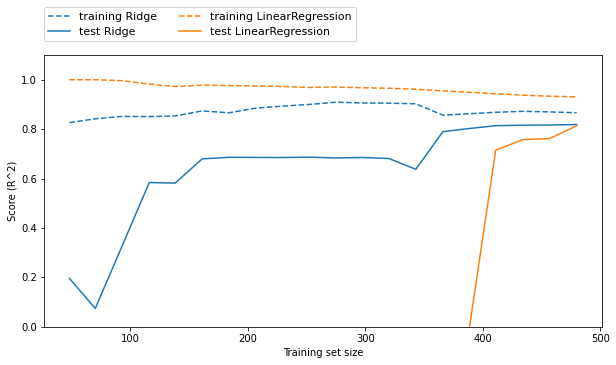

In [10]:
plt.figure(figsize=(10,5))
mglearn.plots.plot_ridge_n_samples()

#훈련데이터에서는 선형회귀모델 점수가 더 높지만, 테스트데이터에서는 릿지선형회귀 모델 점수가 더 높음
#특이사항1:데이터를 충분히 많이 주면 규제항은 덜 중요해져서 릿지 회귀와 선형회귀의 성능이 같아질것. 
#특이사항2: 선형 회귀의 훈련 데이터 성능이 감소하고 있음-> 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문

#### 회귀에서 많이 쓰이는 선형 모델 **`3.Lasso Regression`**
- Ridge의 대안. 계수를 0에 가깝게 한다는 공통점
- **L1규제** 를 사용하며 어떤 계수는 실제로 0이 되기도 함.-> 모델에서 완전히 제외되는 특성이 생긴다는 뜻. 
- 특성 선택(feature selection)이 자동으로 이뤄진다고 볼 수 있음.
- 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내줌

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)  #보스턴 가격 사용
print(f'Train Score:{lasso.score(X_train,y_train):.2f}')
print(f'Test Score:{lasso.score(X_test,y_test):.2f}')
print(f'사용한 특성의 개수:{np.sum(lasso.coef_ !=0)}')

# 과소적합된 상태. 
# alpha 조정필요

Train Score:0.29
Test Score:0.21
사용한 특성의 개수:4


- alpha값 줄이려면 max_iter(반복실행하는 최대 횟수)의 기본값을 늘려야함
- max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생.
- alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해짐

In [12]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f'train score:{lasso001.score(X_train,y_train):.2f}')
print(f'test score:{lasso001.score(X_test,y_test):.2f}')
print(f'사용한 특성의 개수:{np.sum(lasso001.coef_!=0)}')

# alpha값을 낮추면 모델의 복잡도는 증가하여 훈련세트와 테스트세트에서 성능이 좋아짐.
# 성능은 Ridge보다 조금 나은데 사용된 특성은 104개 중 33개뿐이어서 모델을 분석하기가 조금 더 쉬워짐.

train score:0.90
test score:0.77
사용한 특성의 개수:33


In [13]:
lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print(f'train score:{lasso0001.score(X_train,y_train):.2f}')
print(f'test score:{lasso0001.score(X_test,y_test):.2f}')
print(f'사용한 특성의 개수:{np.sum(lasso0001.coef_!=0)}')

train score:0.94
test score:0.74
사용한 특성의 개수:67


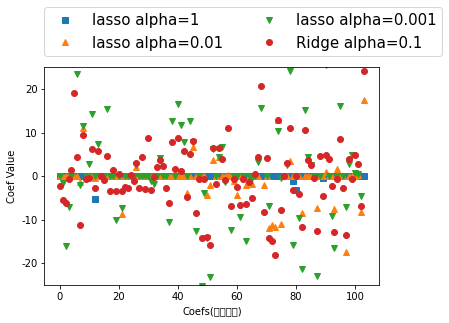

In [14]:
# plt.figure(figsize=(10,6))
plt.plot(lasso.coef_,'s',label='lasso alpha=1')
plt.plot(lasso001.coef_,'^',label= 'lasso alpha=0.01')
plt.plot(lasso0001.coef_,'v',label ='lasso alpha=0.001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('Coefs(계수목록)')  # 특성x 값에 대한 계수 
plt.ylabel('Coef Value')
plt.ylim(-25,25)
plt.legend(ncol = 2, loc=(0,1.05),fontsize =15)

# Ridge 에서 alpha=0.1과 Lasso 에서 alpha=0.1 비교 해보면 모델 성능은 비슷해도 Ridge 사용시 어떤 계수도 0이 되지는 않음

- 보통은 Ridge 회귀 선호 . 하지만 특성이 많고 그중 일부부만 중요하다면 Lasso가 더 좋은 선택일 수도 있음.
- 분석하기 쉬운 모델을 원한다면 Lasso가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어 줄 것. 
- Lasso와 Ridge의 패널티를 결합한 ElasticNet 알고리즘도 있음-> 최상의 성능을 내지만 L1 과 L2 규제를 위한 두 개의 매개변수 조정해야함.
--------------------------

-----------------------------------

### 분류용 선형 모델
- 선형 모델은 분류에서도 널리 사용. 
- 함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고 0보다 크면 클래스를 +1이라고 예측
- 회귀용 선형 모델에서는 출력 \{hat y} 이 특성의 선형함수였다면 분류용 선형 모델에서는 결정경계가 입력의 선형함수임
+ 선형 모델 학습시키는 알고리즘  
    + 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정한는 방법
    + 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

#### `Logistic Regression / SVM`
- Regression이 들어가지만 회귀모형이 아닌 분류모형임에 주의
- 두 모델은 Ridge 와 마찬가지로 기본적으로 L2규제를 사용함

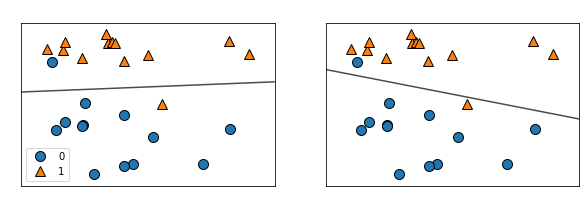

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__,color='white')
    ax.set_xlabel('feature0',color='white')
    ax.set_ylabel('feature1',color='white')
    
axes[0].legend()

+ LogisticRegression 과 LinearSVM에서 규제의 강도를 결정하는 매개변수는 **`C`** **default=1** 
    + C값이 높아지면 규제가 감소. 높은 C는 훈련세트에 최대로 맞추는 것   
    + 알고리즘은 C값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확히 분류하려고 노력

+ 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만들 사용할지 결정하는 penalty 매개변수임.

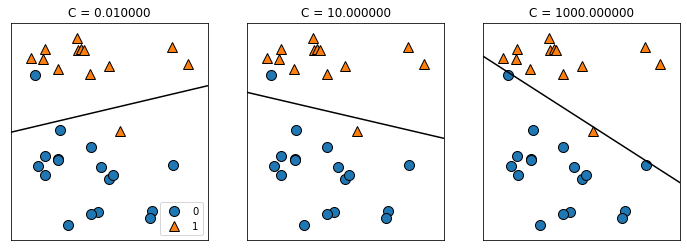

In [25]:
# C=0.001, C=10 , C=1000
mglearn.plots.plot_linear_svc_regularization()

#가장 오른쪽 과대적합 

> breast cancer data 사용해서 Logistic Regression 분석

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print(f'train score:{logreg.score(X_train,y_train):.3f}')
print(f'test score:{logreg.score(X_test,y_test):.3f}')

#훈련점수와 테스트점수 높지만 비슷한 수준이므로 과소적합 상태 -> 모델 제약을 더 풀어줄 필요 있음

train score:0.944
test score:0.958


In [37]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print(f'train score:{logreg100.score(X_train,y_train):.3f}')
print(f'test score:{logreg100.score(X_test,y_test):.3f}')


train score:0.948
test score:0.958


In [34]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print(f'train score:{logreg001.score(X_train,y_train):.3f}')
print(f'test score:{logreg001.score(X_test,y_test):.3f}')


train score:0.934
test score:0.930


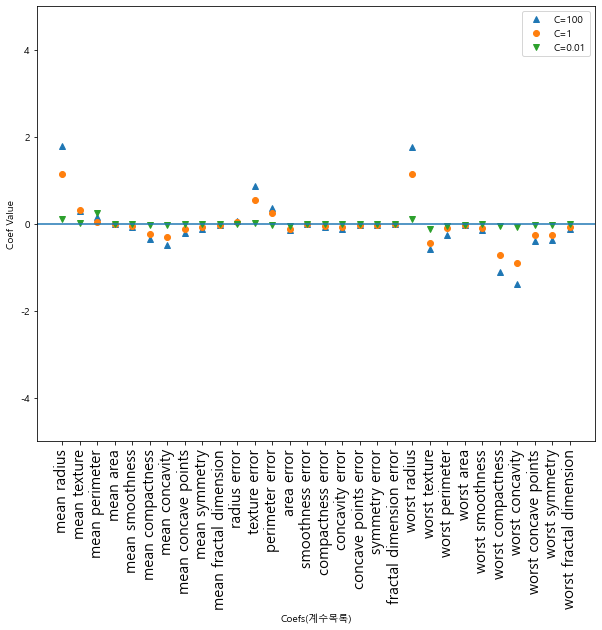

In [46]:
plt.figure(figsize=(10,8))
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg.coef_.T,'o',label= 'C=1')
plt.plot(logreg001.coef_.T,'v',label ='C=0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90,fontsize =15)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel('Coefs(계수목록)')  # 특성x 값에 대한 계수 
plt.ylabel('Coef Value')
plt.rcParams['axes.unicode_minus'] = False
plt.ylim(-5,5)
plt.legend()

> 

### 다중 클래스 분류용 선형 모델
- 로지스틱 회귀만 제외하고 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원
- 일대다 방법 사용  
`일대다 방식`: 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴. 결국 클래스의 수만큼 이진 분류 모델이 만들어짐.

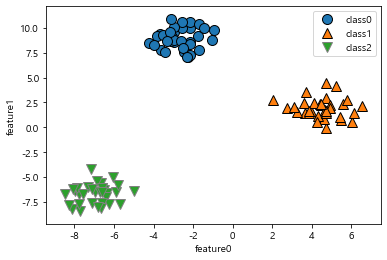

In [47]:
# 세 개의 클래스를 가진 데이터셋에 일대다 방식 적용. 2차원이며 각 클래스의 데이터는 정규분포 따름
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.legend(['class0','class1','class2'])

In [48]:
# 이 데이터셋에 LinearSVC 분류기 훈련 적용
linear_svm = LinearSVC().fit(X,y)
print(f'계수 배열의 크기:{linear_svm.coef_.shape}')
print(f'절편 배열의 크기:{linear_svm.intercept_.shape}')
# coef_배열의 크기는 (3,2). coef_의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며, 열은 각 특성에 따른 계수의 값을 가지고 있음
# intercept_는 각 클래스의 절편을 담은 1차원 벡터

계수 배열의 크기:(3, 2)
절편 배열의 크기:(3,)


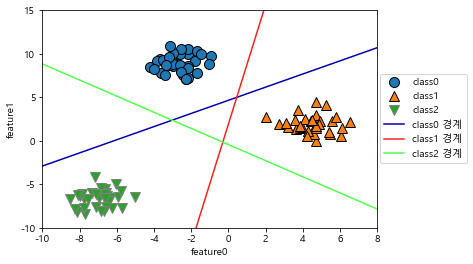

In [58]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)

for coef,intercept,color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0] + intercept) /coef[1], c=color)    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.legend(['class0','class1','class2','class0 경계','class1 경계','class2 경계'],loc =(1.01,0.3))
# plt.figure(figsize=(10,8))   

# 가운데 세모에 들어가는 데이터는 가장 가까운 직선의 클래스에 포함시킴

Text(0, 0.5, 'feature1')

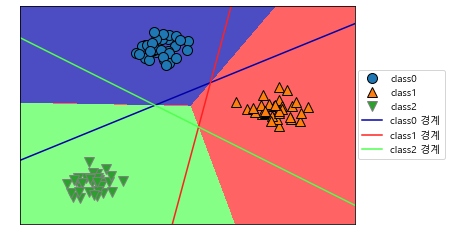

In [60]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)

for coef,intercept,color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0] + intercept) /coef[1], c=color)   
plt.legend(['class0','class1','class2','class0 경계','class1 경계','class2 경계'],loc =(1.01,0.3))
plt.xlabel('feature0',color='white')
plt.ylabel('feature1', color='white')

### 장단점과 매개변수

| 모델 | 매개변수 | 모델 복잡도 |
|---|:---:|---|
| 선형모델 | alpha | 값이 클수록 단순 |
| LinearSVC,LogisticRegression | C | 값이 작을수록 단순|

- 보통 C와 alpha 는 로그 스케일로 최적치로 정함
- 중요한 특성이 많지 않다고 생각하면  L1 규제 사용. 그렇지 않다면 기본적으로 L2 규제를 사용해야함.
- L1 규제는 모델의 해석이 중요한 요소일 때도 사용할 수 있음. L1 규제는 몇가지 특성만 사용하므로 해당 모델에 중요한 특성이 무엇이고 그 효과가 어느 정도인지 설명하기 쉬움

**`장점`**
- 선형모델은 학습 속도가 빠르고 예측도 빠름. 
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동
- 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록  LogisticRegression과 Ridge에 solver='sag' 옵션을 줌. 다른 대안으로는 대용량 처리 버전으로 구현된 SGDClassifier와 SGDRegressor를 사용할 수 있음
- 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있음.

**`단점`**
- 계수의 값들이 왜 그런지 명확하지 않을 때가 종종있음. 특히 데이터셋의 특성들이 서로 깊게 연관되어 있을 때 . -> 분석하기가 매우 어려울 수 있음.
- 선형모델은 샘플에 비해 특성이 많을 때 잘 작동함. 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형모델 많이 사용. 하지만 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋음. 

